<a href="https://colab.research.google.com/github/Gus-1003/GeoProcessamento_Estudos_Dados/blob/main/Sidra_RN_Produ%C3%A7%C3%B5esTemporarias/Sidra_RN_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Produção de Culturas temporárias no Rio Grande do Norte - Ano 2020 - SIDRA - IBGE

## Instalando Pacotes


In [1]:
!pip install geopandas shapely mapclassify libpysal splot esda pysal
!pip install --upgrade pyshp
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import shapefile

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Leitura de arquivos:

### Conexão com o Drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


### geodf = Mapa.json

In [4]:
# ler dados de interesse
geodf = gp.read_file("/content/drive/MyDrive/sidra/RN-2021/RN_Municipios_2021.shp") # ler shapefile
type(geodf)

geopandas.geodataframe.GeoDataFrame

In [5]:
geodf

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,2400109,Acari,RN,608.466,"POLYGON ((-36.62836 -6.27113, -36.62828 -6.271..."
1,2400208,Açu,RN,1303.442,"POLYGON ((-36.87317 -5.48598, -36.87427 -5.486..."
2,2400307,Afonso Bezerra,RN,576.179,"POLYGON ((-36.43987 -5.36988, -36.45524 -5.486..."
3,2400406,Água Nova,RN,50.684,"POLYGON ((-38.30905 -6.17740, -38.28854 -6.187..."
4,2400505,Alexandria,RN,381.205,"POLYGON ((-37.90082 -6.31832, -37.88895 -6.322..."
...,...,...,...,...,...
162,2414704,Várzea,RN,72.684,"POLYGON ((-35.36308 -6.28878, -35.36360 -6.289..."
163,2414753,Venha-Ver,RN,71.621,"POLYGON ((-38.46611 -6.33128, -38.46990 -6.333..."
164,2414803,Vera Cruz,RN,84.127,"POLYGON ((-35.37111 -6.04605, -35.37102 -6.046..."
165,2414902,Viçosa,RN,37.905,"POLYGON ((-37.92119 -5.95980, -37.93401 -6.002..."


In [6]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    167 non-null    object  
 1   NM_MUN    167 non-null    object  
 2   SIGLA     167 non-null    object  
 3   AREA_KM2  167 non-null    float64 
 4   geometry  167 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 6.6+ KB


### dados = dataframe.csv

In [7]:
# ler dados de interesse
dados = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/GeoProcessamento_Estudos_Dados/main/Sidra_RN_Produ%C3%A7%C3%B5esTemporarias/Base_Principal%20(1).csv', delimiter=";", quotechar='"')
dados

,Cód.,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari (RN),-,-,257,-,16000,500
1,2400208,Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra (RN),-,-,421,9333,27480,500
3,2400406,Água Nova (RN),-,-,300,-,-,556
4,2400505,Alexandria (RN),-,50000,417,-,-,550
...,...,...,...,...,...,...,...,...
162,2414704,Várzea (RN),9500,-,600,8000,-,700
163,2414753,Venha-Ver (RN),-,45000,615,7200,-,737
164,2414803,Vera Cruz (RN),8900,-,600,12000,-,800
165,2414902,Viçosa (RN),9000,-,500,-,-,800


In [8]:
dados.head()

,Cód.,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari (RN),-,-,257,-,16000,500
1,2400208,Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra (RN),-,-,421,9333,27480,500
3,2400406,Água Nova (RN),-,-,300,-,-,556
4,2400505,Alexandria (RN),-,50000,417,-,-,550


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cód.                     167 non-null    int64 
 1   Município                167 non-null    object
 2   Batata-doce (Kg/ha)      167 non-null    object
 3   Cana-de-açúcar(Kg/ha)    167 non-null    object
 4   Feijão (em grão)(Kg/ha)  167 non-null    object
 5   Mandioca(Kg/ha)          167 non-null    object
 6   Melancia(Kg/ha)          167 non-null    object
 7   Milho (em grão)(Kg/ha)   167 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.6+ KB


### Correções:

In [10]:
dados = dados.replace("-", 0)
dados = dados.replace("...", 0)

In [11]:
produtos = dados.iloc[:, 2:].astype(int)

In [12]:
dados.iloc[:, 2:] = produtos
dados

,Cód.,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari (RN),0,0,257,0,16000,500
1,2400208,Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra (RN),0,0,421,9333,27480,500
3,2400406,Água Nova (RN),0,0,300,0,0,556
4,2400505,Alexandria (RN),0,50000,417,0,0,550
...,...,...,...,...,...,...,...,...
162,2414704,Várzea (RN),9500,0,600,8000,0,700
163,2414753,Venha-Ver (RN),0,45000,615,7200,0,737
164,2414803,Vera Cruz (RN),8900,0,600,12000,0,800
165,2414902,Viçosa (RN),9000,0,500,0,0,800


## Merge (Dados and Mapa)

In [13]:
# mesclar shapefile com dataframe usando a coluna mun
geodf.rename(columns={'CD_MUN': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
geodf['mun'] = geodf.mun.astype(int)  # transformar códigos em inteiros

In [14]:
dados.rename(columns={'Cód.': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
dados['mun'].astype(int)

0      2400109
1      2400208
2      2400307
3      2400406
4      2400505
        ...   
162    2414704
163    2414753
164    2414803
165    2414902
166    2415008
Name: mun, Length: 167, dtype: int64

In [15]:
br = pd.merge(geodf, dados, on='mun', suffixes=('', '_y'))  # mesclar o dataframe e o shapefile em um objeto
br = br.loc[:, br.columns != 'NM_MUNICIP']  # tirar a coluna NM_MUNICIP

In [16]:
br.head(10)

,mun,NM_MUN,SIGLA,AREA_KM2,geometry,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari,RN,608.466,"POLYGON ((-36.62836 -6.27113, -36.62828 -6.271...",Acari (RN),0,0,257,0,16000,500
1,2400208,Açu,RN,1303.442,"POLYGON ((-36.87317 -5.48598, -36.87427 -5.486...",Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra,RN,576.179,"POLYGON ((-36.43987 -5.36988, -36.45524 -5.486...",Afonso Bezerra (RN),0,0,421,9333,27480,500
3,2400406,Água Nova,RN,50.684,"POLYGON ((-38.30905 -6.17740, -38.28854 -6.187...",Água Nova (RN),0,0,300,0,0,556
4,2400505,Alexandria,RN,381.205,"POLYGON ((-37.90082 -6.31832, -37.88895 -6.322...",Alexandria (RN),0,50000,417,0,0,550
5,2400604,Almino Afonso,RN,128.038,"POLYGON ((-37.76511 -6.07730, -37.76194 -6.084...",Almino Afonso (RN),10000,50000,556,0,0,667
6,2400703,Alto do Rodrigues,RN,191.334,"POLYGON ((-36.71031 -5.32150, -36.66436 -5.372...",Alto do Rodrigues (RN),0,0,500,0,25000,389
7,2400802,Angicos,RN,741.582,"POLYGON ((-36.57273 -5.58593, -36.49281 -5.595...",Angicos (RN),0,0,354,0,0,400
8,2400901,Antônio Martins,RN,244.897,"POLYGON ((-37.90738 -6.14497, -37.90738 -6.145...",Antônio Martins (RN),0,0,450,0,0,625
9,2401008,Apodi,RN,1602.477,"POLYGON ((-37.69110 -5.48236, -37.71163 -5.510...",Apodi (RN),9800,0,939,8560,28780,1545


In [17]:
br.columns

Index(['mun', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry', 'Município',
       'Batata-doce (Kg/ha)', 'Cana-de-açúcar(Kg/ha)',
       'Feijão (em grão)(Kg/ha)', 'Mandioca(Kg/ha)', 'Melancia(Kg/ha)',
       'Milho (em grão)(Kg/ha)'],
      dtype='object')

### Representação Gráfica - Dados - Culturas:

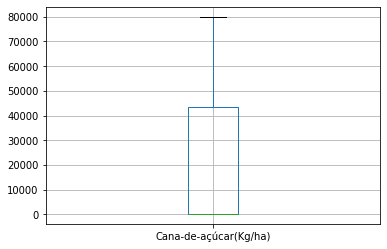

In [18]:
boxplot = br.boxplot(column=['Cana-de-açúcar(Kg/ha)'])

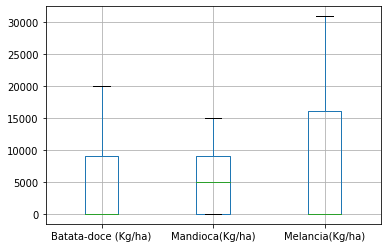

In [19]:
boxplot = br.boxplot(column=['Batata-doce (Kg/ha)',	'Mandioca(Kg/ha)',	'Melancia(Kg/ha)'])

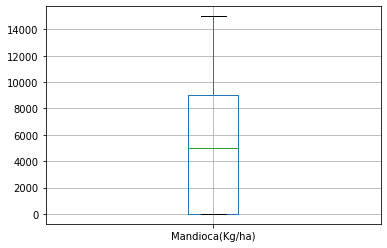

In [20]:
boxplot = br.boxplot(column=['Mandioca(Kg/ha)'])

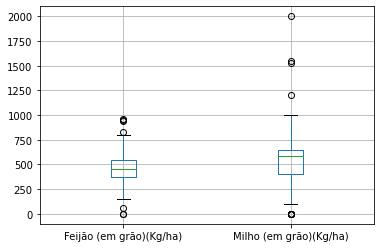

In [21]:
boxplot = br.boxplot(column=['Feijão (em grão)(Kg/ha)', 'Milho (em grão)(Kg/ha)'])

## Escolha da Cultura alvo:

In [22]:
variavel = 'Feijão (em grão)(Kg/ha)'      # escolher a variável e colocar entre aspas

### Estatísticas Descritivas:

In [23]:
# resumo estatístico
br[variavel].describe()

count    167.000000
mean     452.449102
std      155.355390
min        0.000000
25%      368.500000
50%      450.000000
75%      550.500000
max      957.000000
Name: Feijão (em grão)(Kg/ha), dtype: float64

In [24]:
# visualizar os municípios em ordem decrescente (ou crescente)
br.sort_values(variavel, ascending=False)[['NM_MUN', variavel]].head(10)

,NM_MUN,Feijão (em grão)(Kg/ha)
54,Itaú,957
119,Rodolfo Fernandes,955
9,Apodi,939
107,Pendências,833
136,São Miguel do Gostoso,800
30,Coronel Ezequiel,800
129,São Francisco do Oeste,714
34,Doutor Severiano,714
160,Umarizal,682
149,Severiano Melo,664


### Representações Gráficas - Variavel:

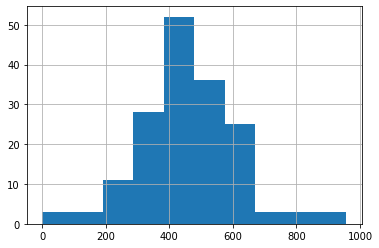

In [25]:
# histograma
br[variavel].hist();

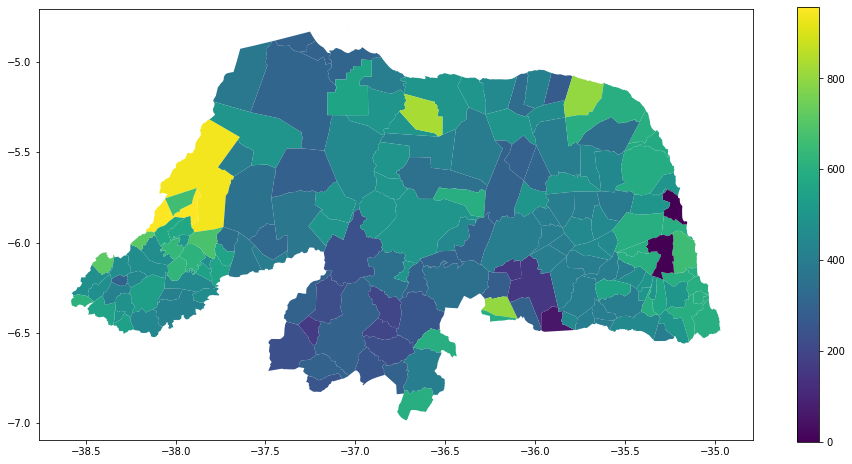

In [26]:
# mapa temático - simples
ax = br.plot(figsize=(16,8), column='Feijão (em grão)(Kg/ha)', legend = True)

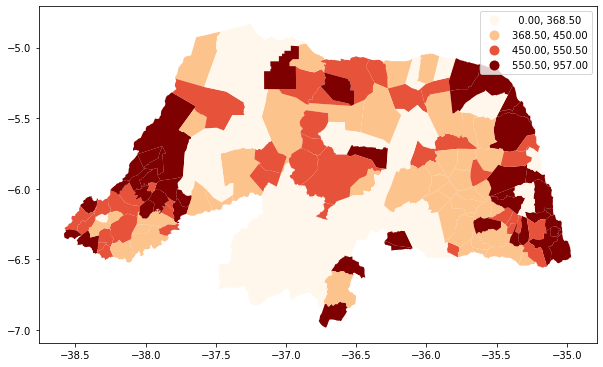

In [27]:
# mapa temático - quantiles
br.plot(column=variavel, figsize=(10, 10), scheme='Quantiles', cmap='OrRd', legend=True, k=4);

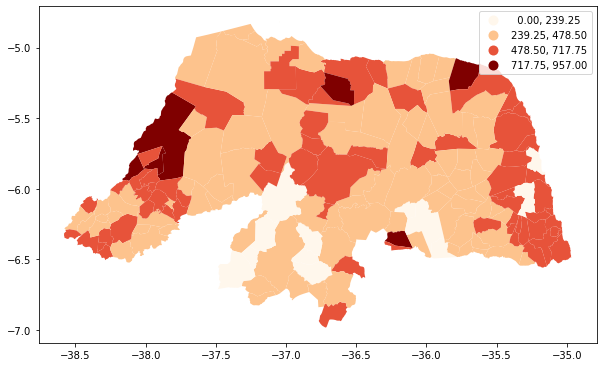

In [28]:
# mapa temático - equal_interval
br.plot(column=variavel, figsize=(10, 10), scheme='Equal_Interval', cmap='OrRd', legend=True, k=4);

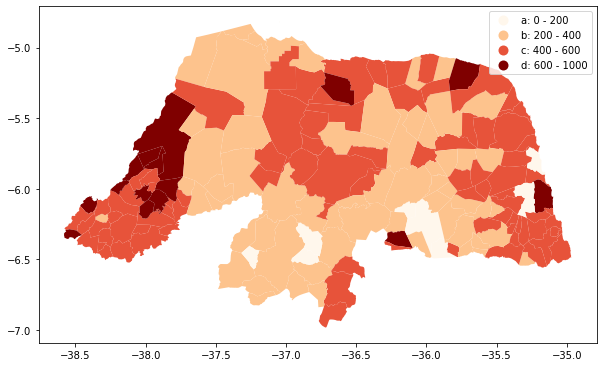

In [29]:
# intervalos de valores definidos pelo usuário
referencia = [200, 400, 600, 1000]     # valores de referência considera 'abaixo que'
labels = ['a: 0 - 200', 'b: 200 - 400', 'c: 400 - 600', 'd: 600 - 1000']  # letras por causa de ordenação alfabética
valores = br[variavel]
quantis = mc.UserDefined(valores, referencia)
cl = [labels[i] for i in quantis.yb]
df = br.assign(cl=cl)
df.cl = pd.Categorical(df.cl, ordered=True, categories=labels)
df.plot(column='cl', figsize=(10, 10), cmap='OrRd', legend=True);

## Matrizes de Vizinhança:

In [30]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(br)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = br[variavel].values
moran = Moran(y, w)
moran.I

0.3591861894414447

In [31]:
br.shape

(167, 12)

In [32]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(br)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = br[variavel].values
moran = Moran(y, w)
moran.I

0.3591861894414447

### Nível de significância:

In [33]:
# valor-p   nível de significância: 0,05
moran.p_sim

0.001

### Diagrama de Dispersão:

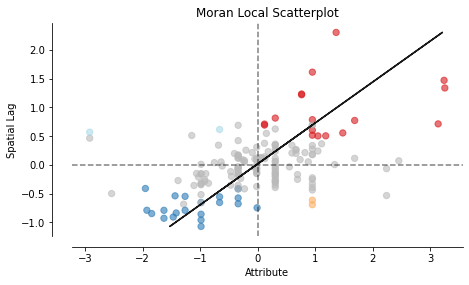

In [34]:
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

### Mapa LISA

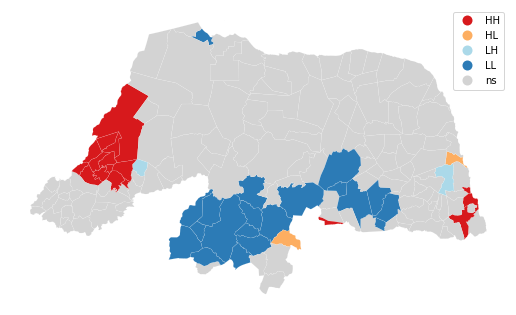

In [35]:
lisa_cluster(moran_loc, br, p=0.05, figsize = (9,9));